In [18]:
# filter warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# keras imports
import tensorflow as tf
#from vgg16 import VGG16, preprocess_input
#from vgg19 import VGG19, preprocess_input
#from resnet50 import ResNet50, preprocess_input
#from inception_v3 import InceptionV3, preprocess_input
from xception import Xception, preprocess_input
from tensorflow.contrib.keras.python.keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder
import _pickle as cPickle

# scikit-learn 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
#from tensorflow.contrib.learn.python.learn.preprocessing import LabelEncoder
#from tensorflow.contrib.learn.python.learn.metrics import classification_report, confusion_matrix
#from tensorflow.contrib.learn.python.learn.linear_model import LogisticRegression
#from tensorflow.contrib.learn.python.learn.model_selection import train_test_split

# other imports
import numpy as np
import glob
import cv2
import h5py
import os
import json
import datetime
import sys
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from scipy.ndimage import imread

In [2]:
# config variables
model_name = 'xception'
weights = 'imagenet'
include_top = 0
train_path = 'jpg'
features_path = 'output/flowers_17/xception/features.h5'
labels_path = 'output/flowers_17/xception/labels.h5'
test_size = 0.1
results = 'output/flowers_17/xception/results.txt'
classfier_file = 'output/flowers_17/xception/classifier.cpickle'

In [5]:
# data load 부분

h5f_data = h5py.File(features_path, 'r')
h5f_label = h5py.File(labels_path, 'r')

features_string = h5f_data['dataset_1']
labels_string = h5f_label['dataset_1']

features = np.array(features_string)
labels   = np.array(labels_string)

del features_string
del labels_string

In [6]:
# 학습 & 테스트 데이터 나누기

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=9)

In [7]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1395, 2048)
(599, 2048)
(1395,)
(599,)


In [9]:
# 모델 생성

model = LogisticRegression(random_state=9)

In [10]:
# 학습 시작

model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=9, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
# use rank-1 and rank-5 predictions
f = open(results, "w")
rank_1 = 0
rank_5 = 0

# loop over test data
for (label, feature) in zip(y_test, x_test):
    # predict the probability of each class label and 
    # take the top-5 class labels
    predictions = model.predict_proba(np.atleast_2d(feature))[0]
    predictions = np.argsort(predictions)[::-1][:5]
    
    # rank-1 prediction increment
    if label == predictions[0]:
        rank_1 += 1
        
    # rank-5 prediction increment
    if label in predictions:
        rank_5 += 1

# convert accuracies to percentages
rank_1 = (rank_1 / float(len(y_test))) * 100
rank_5 = (rank_5 / float(len(y_test))) * 100

# write the accuracies to file
f.write("rank-1: {:.2f}%\n".format(rank_1))
f.write("rank-5: {:.2f}%\n\n".format(rank_5))

# evaluate the model of test data
preds = model.predict(x_test)

# write the classification report to file
f.write("{}\n".format(classification_report(y_test, preds)))
f.close()

In [12]:
# dump classifier to file
with open(classfier_file, "wb") as f:
    pickle.dump(model, f)

In [13]:
class_names = ["daffodil", "snowdrop", "lilyvalley", "bluebell", "crocus",
			   "iris", "tigerlily", "tulip", "fritillary", "sunflower", 
			   "daisy", "coltsfoot", "dandelion", "cowslip", "buttercup",
			   "windflower", "pansy", "Enchinacea", "Frangipani", "Ipomoea_pandurata", "mugunghwa", "Nymphaea_odorata"]

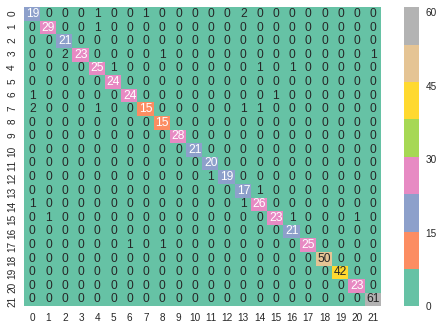

In [14]:
# plot the confusion matrix
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, 
            annot=True,
            cmap="Set2")
plt.show()

In [ ]:
image_files = sorted(glob.glob('jpg/*.jpg'))

In [15]:
x_train

array([[  4.81830984e-01,   2.85626590e-01,   0.00000000e+00, ...,
          3.01295489e-01,   5.00117010e-03,   1.16820991e-01],
       [  1.50928080e-01,   2.16895336e-04,   1.57585949e-01, ...,
          3.95164460e-01,   4.05825168e-01,   9.93862450e-02],
       [  3.86891246e-01,   0.00000000e+00,   1.61042705e-01, ...,
          2.31821194e-01,   0.00000000e+00,   3.57613385e-01],
       ..., 
       [  2.27445886e-02,   2.12339014e-02,   3.71009529e-01, ...,
          1.36283353e-01,   3.31704587e-01,   1.75885614e-02],
       [  3.12119108e-02,   0.00000000e+00,   2.90546846e-02, ...,
          2.43894488e-01,   3.28452475e-02,   3.78623675e-03],
       [  1.15466744e-01,   1.56219974e-01,   3.35335149e-04, ...,
          2.82782018e-01,   1.99118003e-01,   1.15464680e-01]], dtype=float32)